#  Library's

In [ ]:
import pandas as pd
import numpy as np

# Data Preprocess
# New Section
WikiArt Data-Source : https://www.kaggle.com/datasets/steubk/wikiart

In [ ]:
## CSV File
# class_df = pd.read_csv('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/classes.csv')
wclass_df = pd.read_csv('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/wclasses.csv')

In [ ]:
wclass_df.head(2)

,file,artist,genre,style
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144


In [ ]:
wclass_df[['Dir','image']] = wclass_df['file'].str.split('/', 1, expand=True)
wclass_df.head(2)


<ipython-input-21-0992546e8824>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wclass_df[['Dir','image']] = wclass_df['file'].str.split('/', 1, expand=True)


,file,artist,genre,style,Dir,image
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...


In [ ]:
wclass_df[['artist_name','image_description']] = wclass_df['image'].str.split('_', 1, expand=True)
wclass_df.head()

<ipython-input-22-d7ce43896718>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wclass_df[['artist_name','image_description']] = wclass_df['image'].str.split('_', 1, expand=True)


,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent-van-gogh,pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the-angel-appearing-to-the-shepherds-1634.jpg
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160,Post_Impressionism,paul-cezanne_portrait-of-the-artist-s-son.jpg,paul-cezanne,portrait-of-the-artist-s-son.jpg
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152,Impressionism,pierre-auguste-renoir_young-girl-seated-in-a-m...,pierre-auguste-renoir,young-girl-seated-in-a-meadow-1916.jpg
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163,Romanticism,ivan-aivazovsky_morning-1851.jpg,ivan-aivazovsky,morning-1851.jpg


In [ ]:
## Split by -
wclass_df['artist_name'] = wclass_df['artist_name'].str.split('-')
## Join Split Coloum for Artist Coloum
wclass_df['artist_name'] = wclass_df['artist_name'].str.join(' ')
wclass_df.head(2)


,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent van gogh,pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the-angel-appearing-to-the-shepherds-1634.jpg


In [ ]:
## Remove last number and .jpg from image description
wclass_df['image_description'] = wclass_df['image_description'].str.replace(r'\d+\.jpg$', '', regex=True)

In [ ]:
## Remove Remmaning Images Which Does not Have Number but have .jpg at End
wclass_df['image_description'] = wclass_df['image_description'].str.replace(r'.jpg','',regex=True)

In [ ]:
## Split by -
wclass_df['image_description'] = wclass_df['image_description'].str.split('-')
## Join Split Coloum for image_description Coloum
wclass_df['image_description'] = wclass_df['image_description'].str.join(' ')
wclass_df.head(2)

,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent van gogh,pine trees in the fen
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds


In [ ]:
## Filter for Baroque only
data_df =  wclass_df[wclass_df['Dir'] == 'Baroque']
data_df.head(2)

,file,artist,genre,style,Dir,image,artist_name,image_description
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds
20,Baroque/rembrandt_sick-woman-with-a-large-whit...,20,137,144,Baroque,rembrandt_sick-woman-with-a-large-white-headdr...,rembrandt,sick woman with a large white headdress saskia


In [ ]:
## Check For All Images in directory with dataframe file path coloum
import os
import glob


# Get the list of files in the directory
file_list = glob.glob(os.path.join('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/Baroque', '*'))

# Filter out directories (exclude subdirectories)
file_list = [file for file in file_list if os.path.isfile(file)]

# Print the total number of files
total_files = len(file_list)
print("Total files in the directory:", total_files)

In [ ]:
## Filter out only those images file from dataframe which present in that folder
data_df = data_df[data_df['file'].isin(file_list)]


In [ ]:
## Save File
data_df.to_csv('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/data_df.csv',index=False)

# Exploration

In [ ]:
## Entire File Path to dataframe
parent_dir_path = '/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/'
data_df['file'] = parent_dir_path + data_df['file']

<ipython-input-30-052ba3f9eb8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['file'] = parent_dir_path + data_df['file']


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


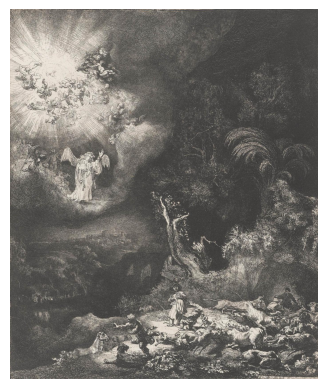

In [ ]:
# Load the image
image_path = data_df.iloc[0]['file']  # Update with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Feature Extration

In [ ]:
!pip install transformers

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet50
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import normalize

## Image Feature Extration

In [ ]:
import torch
from torchvision import transforms
from torchvision.models import resnet50
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define a custom dataset
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)
        return image

# Example image paths
image_paths = data_df.file.values


In [ ]:

# Define the transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the dataset and data loader
dataset = ImageDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Load the ResNet-50 model
model = resnet50(pretrained=True)
model.eval()


In [ ]:
# Extract image features
features = []


with torch.no_grad():
      for images in dataloader:
         try:
            outputs = model(images)
            features.append(outputs)
         except:
            pass

# Concatenate the feature tensors
features = torch.cat(features, dim=0)

# Print the shape of the feature matrix
print(features.shape)

torch.Size([4225, 1000])


In [ ]:
# torch.save(features, '/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/image_feature.pt')

In [ ]:
features.shape

torch.Size([4225, 1000])

In [ ]:
data_df.shape

(4225, 8)

## Text Feature Extration

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/data_df.csv')
data_df.shape

(4225, 8)

In [ ]:
# ## Alternative for tokenizer

# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Example text
# # text = "Hello, how are you?"

# ## Get Array of Texts from Description coloum
# texts = data_df.image_description.values

# # Load the BERT tokenizer
# tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')

# # # Tokenize the text
# tokenizer.fit_on_texts(texts)
# tokenized_text = tokenizer.texts_to_sequences(texts)

# # # Pad the tokenized sequence
# padded_texts = pad_sequences(tokenized_text, padding='post',maxlen=12)

In [ ]:
padded_texts.shape

(4225, 12)

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
## Get Array of Texts from Description coloum
texts = data_df.image_description.values

In [ ]:
## Tokenize That Text
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in texts]


In [ ]:
# ## Make Paddinf of Length to Max 12 Characters
max_length = 12
padded_texts = [tokens[:max_length] + [0] * (max_length - len(tokens)) if len(tokens) < max_length else tokens[:max_length] for tokens in tokenized_texts]


In [ ]:
# Convert the padded texts to tensors
input_ids = torch.tensor(padded_texts[3000:])

# Generate the feature matrices
outputs = model(input_ids)
feature_matrices = outputs.last_hidden_state


In [ ]:
feature_matrices[0].shape

torch.Size([12, 768])

In [ ]:
## Save Features
# torch.save(feature_matrices, '/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/text_desc_feature_4240.pt')


# Merging Individual Features

In [ ]:
## import Image Features

import torch

# Load the PyTorch .pt or .pth file
image_features = torch.load('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/image_feature.pt').numpy()
image_features.shape

(4225, 1000)

In [ ]:
## Merge Diffrent Text Features
text_feature_1000 = torch.load('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/text_desc_feature_1000.pt')
text_feature_2000 = torch.load('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/text_desc_feature_2000.pt')
text_feature_3000 = torch.load('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/text_desc_feature_3000.pt')
text_feature_4240 = torch.load('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/text_desc_feature_4240.pt')


In [ ]:
tensors_list = [text_feature_1000, text_feature_2000, text_feature_2000,text_feature_4240]

text_feature_1000.shape,text_feature_2000.shape

(torch.Size([1000, 12, 768]), torch.Size([1000, 12, 768]))

In [ ]:
text_features = torch.cat(tensors_list, dim=0)
text_features.shape

torch.Size([4225, 12, 768])

In [ ]:
 ### Flatten 12*768 in to one D Array
 text_features = text_features.view(4225, -1).detach().numpy()
 text_features.shape

(4225, 9216)

In [ ]:
### Other Features
df = pd.read_csv('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/data_df.csv')
df.head(3)

,file,artist,genre,style,Dir,image,artist_name,image_description
0,/content/drive/MyDrive/Art_Work_Reccomendation...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds
1,/content/drive/MyDrive/Art_Work_Reccomendation...,20,137,144,Baroque,rembrandt_sick-woman-with-a-large-white-headdr...,rembrandt,sick woman with a large white headdress saskia
2,/content/drive/MyDrive/Art_Work_Reccomendation...,20,135,144,Baroque,rembrandt_portrait-of-margeretha-de-geer-1661.jpg,rembrandt,portrait of margeretha de geer


In [ ]:
artist_features = (df['artist'].values).reshape(-1,1)
genre_features = df['genre'].values.reshape(-1,1)
style_features = df['style'].values.reshape(-1,1)

artist_features.shape,genre_features.shape,style_features.shape

((4225, 1), (4225, 1), (4225, 1))

In [ ]:
merged_final_features = np.concatenate((image_features,text_features,artist_features, genre_features,style_features), axis=1)


In [ ]:
merged_final_features.shape

(4225, 10219)

In [ ]:
## Merged_final_features into file
# np.save('/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/final_features.npy', merged_final_features)

In [ ]:
## Selected images
user_selected_indices = [0, 1, 2]  # Indices of user-selected images


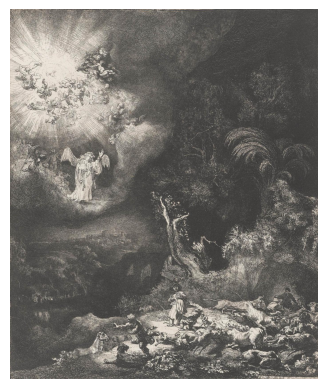

rembrandt
the angel appearing to the shepherds 


In [ ]:
# Load the image 0
image_path = df.iloc[0]['file']  # Update with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

print(df.iloc[0]['artist_name'])
print(df.iloc[0]['image_description'])

In [ ]:
user_selected_features = merged_final_features[user_selected_indices]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
similarity_scores = cosine_similarity(user_selected_features, merged_final_features)

In [ ]:
similarity_scores

array([[1.        , 0.89771973, 0.87435951, ..., 0.88548976, 0.87202485,
        0.90575956],
       [0.89771973, 1.        , 0.90633102, ..., 0.88921311, 0.88277939,
        0.88511037],
       [0.87435951, 0.90633102, 1.        , ..., 0.88030503, 0.86761305,
        0.86531713]])

In [ ]:
# Step 3: Sort and Retrieve Top Similar Images
similar_images_indices = similarity_scores.argsort(axis=1)[:, ::-1]  # Sort indices in descending order
recommended_images_indices = similar_images_indices[:, 1:6]  # Retrieve top 5 similar images (excluding the selected images)


In [ ]:
recommended_images_indices

array([[  25,  752, 1584, 3989,  187],
       [  75,  145,  505,  284,  247],
       [ 325,  484,  690,  231,   68]])

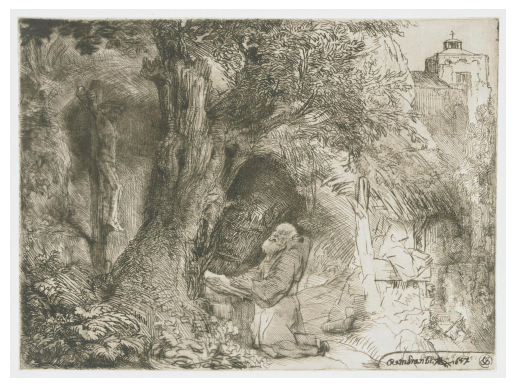

rembrandt
st francis beneath a tree praying 


In [ ]:
image_path = df.iloc[25]['file']  # Update with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

print(df.iloc[25]['artist_name'])
print(df.iloc[25]['image_description'])

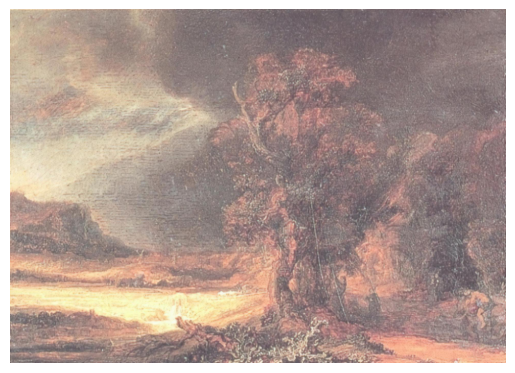

rembrandt
landscape with the good smaritan


In [ ]:
image_path = df.iloc[752]['file']  # Update with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

print(df.iloc[752]['artist_name'])
print(df.iloc[752]['image_description'])